# key : 
## how to tune the params in model of CNN layers for increasing model scores

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [3]:
# Data
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10. load_data()

In [4]:
# check data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


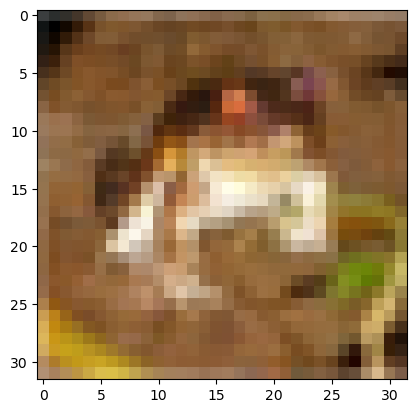

In [5]:
i = 0
print(y_train[i])
plt.imshow(x_train[i])
plt.show()

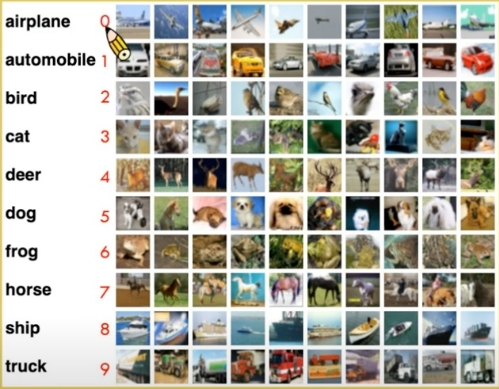

In [6]:
Image(filename="img/10.png",width='500')

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras. layers import Conv2D, MaxPooling2D, AveragePooling2D

keras.backend.clear_session ()
np.random. seed (1)
tf. random. set_seed(1)

# Build model

In [9]:
model = Sequential([
    #CNN 1
    #filters=數量30, kernel_size=(4, 4) filters大小
    #strides=(1, 1)向右移1，向下移1， valid=補 0
    Conv2D(filters=30, kernel_size=(4, 4), strides=(1, 1), padding='valid' ,
           activation='relu', input_shape=(32, 32, 3)), #-------->第一層要註明來源大小：input_shape=(32, 32, 3)
    Dropout (rate=0.25),#比率
    MaxPooling2D (pool_size= (2, 2), padding='valid'),#strides預設與pool_size相同

    #CNN 2
    #kernel_size=3---> (3,3)/strides=2---> (2,2)
    Conv2D (filters=60, kernel_size=3, strides=2 , padding='same',
            activation='relu'),
    Dropout (rate=0.25),
    AveragePooling2D (pool_size=2, padding='same'),#pool_size=(2,2)

    #fully
    Flatten (),
    Dropout (rate=0.25),

    Dense (1024, activation='relu'),
    Dropout (rate=0.25),

    Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 30)        1470      
                                                                 
 dropout (Dropout)           (None, 29, 29, 30)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 60)          16260     
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 60)          0         
                                                                 
 average_pooling2d (Average  (None, 4, 4, 60)          0         
 Pooling2D)                                             

In [11]:
# 2. Compile
model.compile (loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [12]:
# 3. Train
train = model.fit(x_train, y_train, validation_split=0.2,
                  epochs=10, batch_size=128, verbose=1)
#train 50000->80%:40000 ->40000/128=313

Epoch 1/10
313/313 [==============================] - 31s 96ms/step - loss: 1.6330 - accuracy: 0.4077 - val_loss: 1.4142 - val_accuracy: 0.5060
Epoch 2/10
313/313 [==============================] - 29s 93ms/step - loss: 1.3335 - accuracy: 0.5229 - val_loss: 1.2458 - val_accuracy: 0.5713
Epoch 3/10
313/313 [==============================] - 29s 92ms/step - loss: 1.2191 - accuracy: 0.5654 - val_loss: 1.1617 - val_accuracy: 0.6001
Epoch 4/10
313/313 [==============================] - 27s 86ms/step - loss: 1.1400 - accuracy: 0.5953 - val_loss: 1.1058 - val_accuracy: 0.6123
Epoch 5/10
313/313 [==============================] - 28s 89ms/step - loss: 1.0705 - accuracy: 0.6238 - val_loss: 1.0120 - val_accuracy: 0.6610
Epoch 6/10
313/313 [==============================] - 27s 88ms/step - loss: 1.0124 - accuracy: 0.6417 - val_loss: 1.0021 - val_accuracy: 0.6537
Epoch 7/10
313/313 [==============================] - 28s 90ms/step - loss: 0.9682 - accuracy: 0.6583 - val_loss: 0.9401 - val_accuracy:

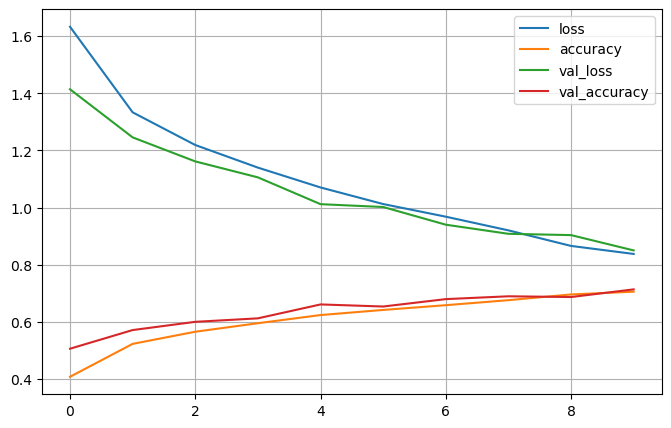

In [13]:
pd. DataFrame (train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [23]:
# 4. Evaluate
model.evaluate (x_test, y_test, verbose=0)

[0.8539615273475647, 0.7080000042915344]

In [15]:
# 5. Predict
y_proba = model.predict (x_test)
y_proba[:3].round (2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.03, 0.48, 0.01, 0.33, 0.11, 0.  , 0.02, 0.  ],
       [0.02, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.56, 0.02],
       [0.22, 0.08, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.6 , 0.08]],
      dtype=float32)

In [16]:
y_pred = np.argmax (y_proba, axis=1)
y_pred[:3]

array([3, 8, 8], dtype=int64)

In [17]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [18]:
# (Confusion matrix)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[769,  21,  59,  19,  16,   2,  13,   4,  68,  29],
       [ 20, 846,   8,   9,   4,   4,  16,   0,  29,  64],
       [ 72,   6, 628,  55,  78,  37,  84,  22,  10,   8],
       [ 21,   7,  99, 513,  62, 145,  95,  33,  14,  11],
       [ 20,   2, 114,  58, 627,  24,  84,  61,   9,   1],
       [ 20,   1,  89, 208,  39, 539,  47,  44,   8,   5],
       [  6,   4,  51,  40,  21,   7, 861,   4,   4,   2],
       [ 16,   4,  57,  52,  54,  47,  16, 747,   1,   6],
       [ 57,  38,  20,  16,   9,   5,   6,   3, 827,  19],
       [ 41, 129,  12,  21,   7,  10,  13,  11,  33, 723]], dtype=int64)